# Execute the code below

In [ ]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [ ]:
# Your code here :

df_opinion = df_opinion.rename(columns = {'date':'DATE'})
df2018 = pd.merge(df_main, df_opinion, how='left', on= 'DATE')

df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad


# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [ ]:
# Your code here :

# a DF with only rows without NaN, you'll call it "df_clean".

df_clean = df2018[~df2018.isnull().any(axis=1)]

# a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan".
df_nan = df2018[df2018.isnull().any(axis=1)]
print(df_clean.info())
print(df_nan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    341 non-null    object 
 1   MAX_TEMPERATURE_C       341 non-null    int64  
 2   MIN_TEMPERATURE_C       341 non-null    int64  
 3   WINDSPEED_MAX_KMH       341 non-null    int64  
 4   TEMPERATURE_MORNING_C   341 non-null    int64  
 5   TEMPERATURE_NOON_C      341 non-null    int64  
 6   TEMPERATURE_EVENING_C   341 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     341 non-null    float64
 8   HUMIDITY_MAX_PERCENT    341 non-null    int64  
 9   VISIBILITY_AVG_KM       341 non-null    float64
 10  PRESSURE_MAX_MB         341 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  341 non-null    float64
 12  HEATINDEX_MAX_C         341 non-null    int64  
 13  DEWPOINT_MAX_C          341 non-null    int64  
 14  WINDTEMP_MAX_C          341 non-null    in

## Now, train your model
For this part, let's work on df_clean. 
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!). 

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [ ]:
# Your code here

from sklearn.linear_model import LinearRegression

df = df_clean.loc[:, df_clean.columns != 'SUNHOUR']
X = df.loc[:, df.select_dtypes(exclude=['object']).columns.tolist()]
y = df_clean[['SUNHOUR']]


model = LinearRegression().fit(X, y)

print('score:', model.score(X,y))
print("coefficient :", model.coef_)
print("interception :", model.intercept_)

score: 0.7381273732150058
coefficient : [[-7.00646654e-01 -5.14647810e-01 -1.50536540e-02  4.18810014e-01
   2.23802210e-01  4.99770480e-01 -7.08219049e-02 -4.06811094e-02
  -4.65874828e-01 -8.39856792e-02 -8.36771470e-02  3.43356927e-02
   9.20487651e-02  1.03145887e-01 -4.51666552e-04  0.00000000e+00
   4.31032654e-02]]
interception : [105.62641433]


## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [ ]:
# Your code here :

X_train = df_clean.drop(columns=['DATE', 'SUNHOUR','OPINION', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX'])
y_train = df_clean['SUNHOUR']

LinearRegression().fit(X_train, y_train)


X_test = df_nan.drop(columns=['DATE', 'SUNHOUR','OPINION', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX'])
lireg = LinearRegression().fit(X_train, y_train)
y_test = lireg.predict(X_test)

value = y_test.tolist()
keys = df_nan.index
d = pd.Series(value, index=keys).to_dict()
df_nan['SUNHOUR'].fillna(d, inplace=True)
df_nan['SUNHOUR']

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


18      7.374450
31      8.184722
66      7.497337
100     9.690865
118     6.374707
143    14.063619
152    14.231525
163    12.871937
165    10.253658
175    15.617924
184    12.316241
191    14.324790
194    14.970551
197    12.682214
204    14.489800
220    11.515354
225    12.937171
234    11.110940
266    10.642837
317    10.482131
321    10.938673
325     7.723055
346     4.613348
349     7.309835
Name: SUNHOUR, dtype: float64

## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values. 

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

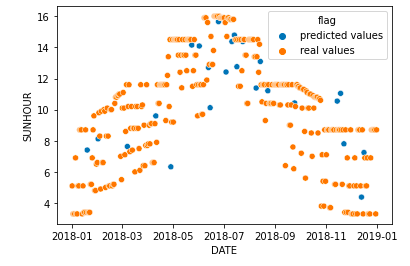

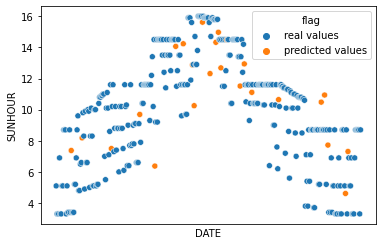

In [ ]:
# Your code here

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_clean = df_clean.assign(flag='real values')
df_nan = df_nan.assign(flag='predicted values')
df2018complete = pd.concat([df_clean, df_nan]).sort_index()

sns.scatterplot(data = df2018complete, x= 'DATE', y= 'SUNHOUR', hue = 'flag')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))